In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
#there are no missing values in the data

In [4]:
data = df.copy()

In [5]:
#RowNumber, CustomerId, Surname does not play any role in churn prediction, So we will drop these columns

In [6]:
data = data.drop("RowNumber", axis=1)

In [7]:
data = data.drop("CustomerId", axis=1)

In [8]:
data = data.drop("Surname", axis=1)


In [9]:
data["Age_cat"] = pd.cut(data["Age"], bins=[15,25,35,45,55,65,75,85,95], labels=[1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
#pd.set_option('display.max_rows', None)

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["Age_cat"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [13]:
for sett in(train_set, test_set):
    sett.drop("Age_cat", axis=1, inplace=True)

In [14]:
churn = train_set.copy()

In [15]:
churn_feat = churn.drop("Exited", axis=1)
churn_label = train_set["Exited"].copy()

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
set(churn_feat["Geography"])

{'France', 'Germany', 'Spain'}

In [18]:
geo_cat = churn_feat["Geography"]

In [19]:
onehot_encoder = OneHotEncoder()
geo_cat = onehot_encoder.fit_transform(geo_cat.to_frame())

In [20]:
geo_cat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8000 stored elements and shape (8000, 3)>

In [21]:
geo_cat.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(8000, 3))

In [22]:
gender_cat = churn_feat["Gender"]

In [23]:
gender_cat = onehot_encoder.fit_transform(gender_cat.to_frame())

In [24]:
gender_cat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8000 stored elements and shape (8000, 2)>

In [25]:
gender_cat.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], shape=(8000, 2))

In [26]:
geo_cat = pd.DataFrame(geo_cat.toarray(), columns=['France', 'Germany', 'Spain'])

In [27]:
gender_cat = pd.DataFrame(gender_cat.toarray(), columns=['Female', 'Male'])

In [28]:
churn_feat

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6374,503,France,Male,38,1,0.00,2,1,1,95153.24
7248,605,Spain,Female,57,2,0.00,3,1,0,66652.75
7848,433,France,Female,49,10,0.00,1,1,1,87711.61
5780,604,Germany,Female,42,10,166031.45,1,1,0,98293.14
4561,562,Germany,Male,31,4,127237.25,2,0,1,143317.42
...,...,...,...,...,...,...,...,...,...,...
2022,501,Germany,Male,24,4,130806.42,2,1,0,80241.14
62,555,Spain,Male,33,1,56084.69,2,0,0,178798.13
9216,724,France,Male,30,10,0.00,2,1,1,54265.55
4488,716,France,Female,44,6,155114.90,1,0,0,133871.83


In [29]:
churn_feat = churn_feat.reset_index(drop=True)

In [30]:
churn_feat = pd.concat([churn_feat, geo_cat, gender_cat], axis=1)

In [31]:
churn_feat = churn_feat.drop('Geography', axis=1)

In [32]:
churn_feat = churn_feat.drop('Gender', axis=1)

In [33]:
churn_feat

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,503,38,1,0.00,2,1,1,95153.24,1.0,0.0,0.0,0.0,1.0
1,605,57,2,0.00,3,1,0,66652.75,0.0,0.0,1.0,1.0,0.0
2,433,49,10,0.00,1,1,1,87711.61,1.0,0.0,0.0,1.0,0.0
3,604,42,10,166031.45,1,1,0,98293.14,0.0,1.0,0.0,1.0,0.0
4,562,31,4,127237.25,2,0,1,143317.42,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,501,24,4,130806.42,2,1,0,80241.14,0.0,1.0,0.0,0.0,1.0
7996,555,33,1,56084.69,2,0,0,178798.13,0.0,0.0,1.0,0.0,1.0
7997,724,30,10,0.00,2,1,1,54265.55,1.0,0.0,0.0,0.0,1.0
7998,716,44,6,155114.90,1,0,0,133871.83,1.0,0.0,0.0,1.0,0.0


In [34]:
import matplotlib.pyplot as plt

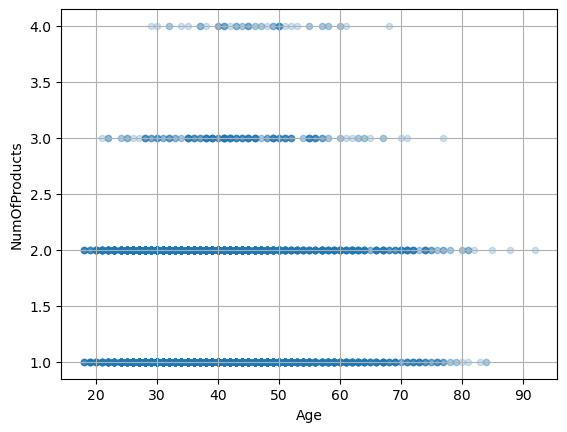

In [35]:
churn_feat.plot(kind="scatter", x='Age', y='NumOfProducts', grid=True, alpha=0.2)
plt.show()

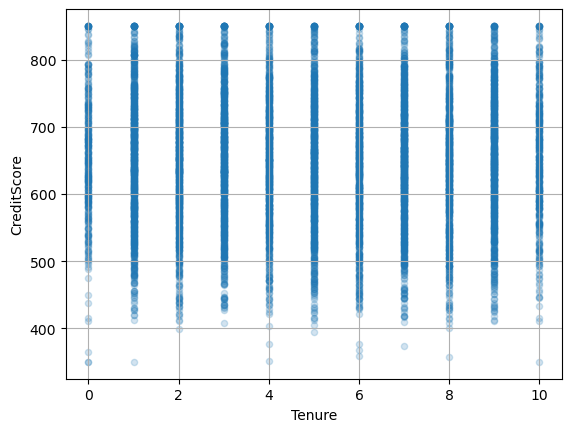

In [36]:
churn_feat.plot(kind="scatter", x='Tenure', y='CreditScore', grid=True, alpha=0.2)
plt.show()

In [37]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_cat
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,3


In [38]:
from pandas.plotting import scatter_matrix

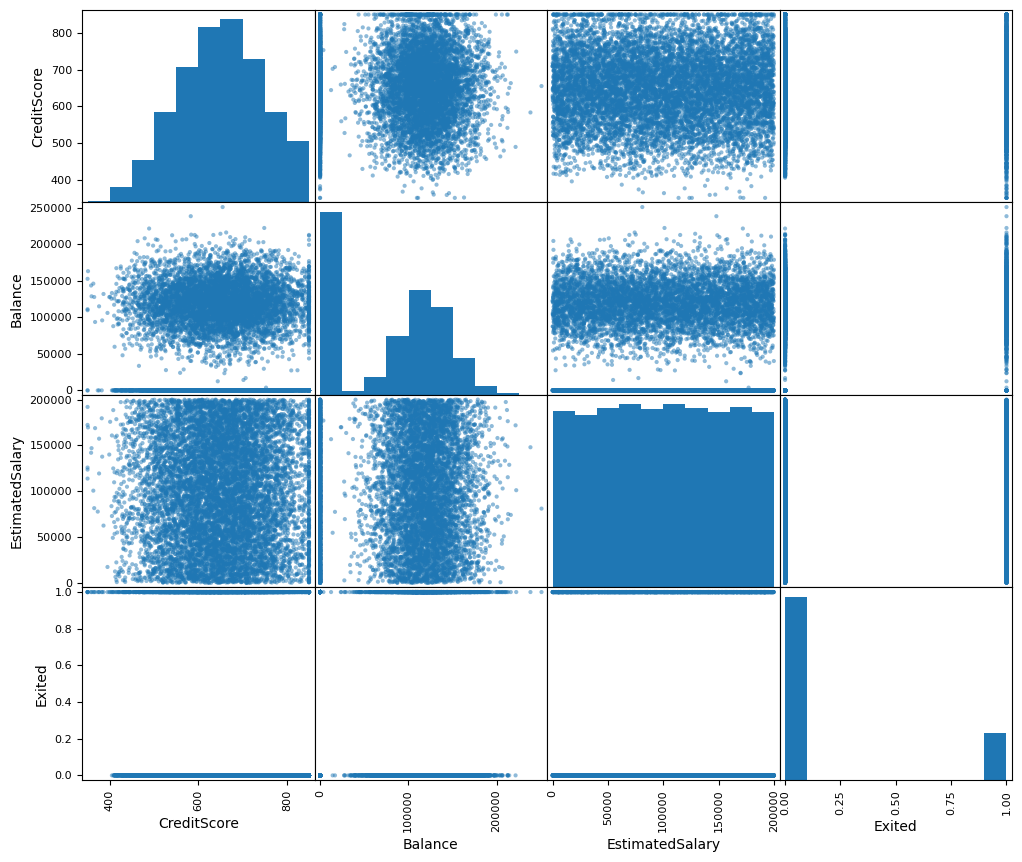

In [39]:
attributes = ['CreditScore', 'Balance', 'EstimatedSalary', 'Exited']

scatter_matrix(data[attributes], figsize=(12,10))
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
std_scaler = StandardScaler()
churn_feat_scaled = std_scaler.fit_transform(churn_feat)

In [42]:
churn_feat_scaled

array([[-1.52299524, -0.08770252, -1.38265795, ..., -0.57234647,
        -0.91924885,  0.91924885],
       [-0.46743119,  1.72206984, -1.03884148, ...,  1.74719344,
         1.08784471, -1.08784471],
       [-2.24740195,  0.96006042,  1.71169032, ..., -0.57234647,
         1.08784471, -1.08784471],
       ...,
       [ 0.76406021, -0.84971193,  1.71169032, ..., -0.57234647,
        -0.91924885,  0.91924885],
       [ 0.68127087,  0.48380454,  0.33642442, ..., -0.57234647,
         1.08784471, -1.08784471],
       [ 0.05000217,  0.10279983, -1.72647443, ..., -0.57234647,
         1.08784471, -1.08784471]], shape=(8000, 13))

In [43]:
churn_feat_scaled = pd.DataFrame(data=churn_feat_scaled, columns=churn_feat.columns)

In [44]:
churn_feat_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,-1.522995,-0.087703,-1.382658,-1.231424,0.793304,0.645897,0.974329,-0.087523,1.005515,-0.586588,-0.572346,-0.919249,0.919249
1,-0.467431,1.722070,-1.038841,-1.231424,2.502089,0.645897,-1.026347,-0.585125,-0.994515,-0.586588,1.747193,1.087845,-1.087845
2,-2.247402,0.960060,1.711690,-1.231424,-0.915482,0.645897,0.974329,-0.217449,1.005515,-0.586588,-0.572346,1.087845,-1.087845
3,-0.477780,0.293302,1.711690,1.430400,-0.915482,0.645897,-1.026347,-0.032702,-0.994515,1.704773,-0.572346,1.087845,-1.087845
4,-0.912424,-0.754461,-0.351209,0.808450,0.793304,-1.548234,0.974329,0.753397,-0.994515,1.704773,-0.572346,-0.919249,0.919249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.543693,-1.421219,-0.351209,0.865671,0.793304,0.645897,-1.026347,-0.347879,-0.994515,1.704773,-0.572346,-0.919249,0.919249
7996,-0.984865,-0.563958,-1.382658,-0.332271,0.793304,-1.548234,-1.026347,1.372870,-0.994515,-0.586588,1.747193,-0.919249,0.919249
7997,0.764060,-0.849712,1.711690,-1.231424,0.793304,0.645897,0.974329,-0.801398,1.005515,-0.586588,-0.572346,-0.919249,0.919249
7998,0.681271,0.483805,0.336424,1.255386,-0.915482,-1.548234,-1.026347,0.588482,1.005515,-0.586588,-0.572346,1.087845,-1.087845
